In [113]:
%run _imports.ipynb

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import seaborn as sns

In [2]:
# Standards for figures format:
# - length single column figure: 88 mm
# - length 1.5 column figure: 120-136 mm
# - length 2 columns figure: 180 mm
# - max. height figure : 247 mm

fig_length = {1:   3.46457,    # 1 column
              1.5: 5.35433,    # 1.5 columns
              2:   7.08661}    # 2 columns
fig_height = 9.72441 # maxium height
fontsize_title = 8
fontsize_label = 7
fontsize_legend = 7
fontsize_axs = 7
spineline_width = 0.6

titles = [
    "Lithium hydroxide | Brine",
    "Lithium hydroxide | Spodumene",
    "Cobalt sulfate",
    "Nickel sulfate",
    "Natural graphite"
]


### Fig 1: Minerals demand and GHG-emission intensity

In [3]:
total_demand = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="Total demand").ffill(axis=0)
ev_demand = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="EV demand").ffill(axis=0)

ghg_emission_intensity_metals = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="GHG intensity metals", index_col=0).ffill(axis=0).T
ghg_emission_intensity_commodities = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="GHG intensity commodities", index_col=0).ffill(axis=0)

In [4]:
total_demand_2022 = total_demand[(total_demand["Scenario"] == "STEPS") & (total_demand["Year"] == 2022)].reset_index()
total_demand_2050_NZE = total_demand[(total_demand["Scenario"] == "NZE") & (total_demand["Year"] == 2050)].reset_index()

ev_demand_2022 = ev_demand[(ev_demand["Scenario"] == "STEPS") & (ev_demand["Year"] == 2022)].reset_index()
ev_demand_2050_NZE = ev_demand[(ev_demand["Scenario"] == "NZE") & (ev_demand["Year"] == 2050)].reset_index()

In [5]:
share_ev_demand = ev_demand.iloc[:,2:].div(total_demand.iloc[:,2:]).multiply(100)
share_ev_demand = pd.concat([total_demand.iloc[:,:2], share_ev_demand], axis=1)

In [6]:
total_demand_increase_rltv_2050_NZE = total_demand_2050_NZE.iloc[:,3:].div(total_demand_2022.iloc[:,3:], axis=0)
total_demand_increase_rltv_2050_NZE = total_demand_increase_rltv_2050_NZE.T.sort_values(by=0, ascending=False)
total_demand_increase_rltv_2050_NZE

,0
Lithium,16.104835
Manganese,12.893648
Nickel,8.242071
Graphite,5.907962
Neodymium,5.631873
Cobalt,4.263434
Copper,3.025074
Silicon,2.900626


In [7]:
total_demand_increase_abs_2050_NZE = total_demand_2050_NZE.iloc[:,3:] - total_demand_2022.iloc[:,3:]
ev_demand_increase_abs_2050_NZE = ev_demand_2050_NZE.iloc[:,3:] - ev_demand_2022.iloc[:,3:]

demand_increase_by_ev = ev_demand_increase_abs_2050_NZE.div(total_demand_increase_abs_2050_NZE).T
demand_increase_by_ev

,0
Copper,0.276319
Lithium,0.935750
Cobalt,1.015762
Graphite,0.752777
Nickel,0.895996
Manganese,0.895867
Silicon,0.540747
Neodymium,0.740462


In [8]:
ghg_emission_intensity_metals

Emission intensity,Low,High
Lithium hydroxide,7.300000,15.700000
Manganese sulfate,0.700000,4.800000
Nickel sulfate,3.500000,22.400000
Graphite,6.300000,20.600000
Neodymium oxide,25.000000,25.000000
Cobalt sulfate,4.000000,35.600000
Copper cathode,4.100000,4.100000
Silicon (metallurgical),11.524619,11.524619


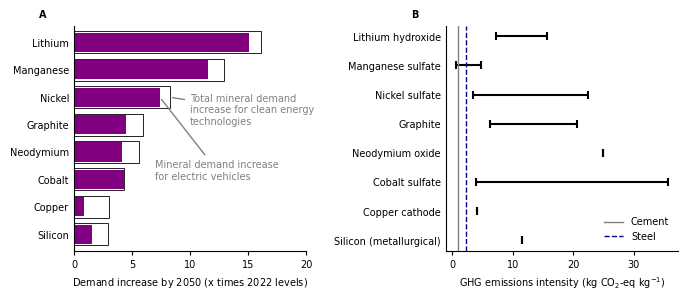

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(fig_length[2]*1.1, fig_height*0.3))

total_demand_increase_rltv_2050_NZE.plot.barh(ax=axs[0], color="white", edgecolor="black", width=0.80, 
                                              fontsize=fontsize_axs, lw=spineline_width, zorder=2, legend=False)

share_rltv_increase_ev_2050_NZE = total_demand_increase_rltv_2050_NZE.multiply(demand_increase_by_ev)
share_rltv_increase_ev_2050_NZE = share_rltv_increase_ev_2050_NZE.reindex(index=total_demand_increase_rltv_2050_NZE.index)
share_rltv_increase_ev_2050_NZE.plot.barh(ax=axs[0], color="purple", edgecolor="none", width=0.70, 
                                          fontsize=fontsize_axs, lw=spineline_width, zorder=2, legend=False)

x_avg = (ghg_emission_intensity_metals["High"] + ghg_emission_intensity_metals["Low"])/2
axs[1].errorbar(x= x_avg,
                y=ghg_emission_intensity_metals.index,
                xerr=[x_avg - ghg_emission_intensity_metals["Low"],
                      ghg_emission_intensity_metals["High"] - x_avg],
                   color='black', capsize=3, capthick=1.5, linewidth=1.5, fmt='None')


commodities_line = ["-", "--", ":", "dashdot"]
commodities_color = ["grey", "navy", "olive", "red"]
count_com = 0
for index, row in ghg_emission_intensity_commodities.iterrows():
    axs[1].axvline(x=row["Value"], color=commodities_color[count_com], linestyle=commodities_line[count_com], lw=1, label=index)
    count_com += 1

axs[0].set_title("A", loc='left', x=-0.15, fontweight='bold', fontsize=fontsize_axs)
axs[1].set_title("B", loc='left', x=-0.15, fontweight='bold', fontsize=fontsize_axs)

axs[0].set_xlabel('Demand increase by 2050 (x times 2022 levels$^{}$)', fontsize=fontsize_label)
axs[1].set_xlabel('GHG emissions intensity (kg CO$_2$-eq kg$^{-1}$)', fontsize=fontsize_label)

for ax in axs:
    ax.invert_yaxis()
    ax.tick_params(axis='x', which='major', direction='out', length=3, labelsize=fontsize_axs)
    ax.tick_params(axis='y', which='major', direction='out', length=0, labelsize=fontsize_axs)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    
axs[0].set_xlim(0, 20)
# Anote figure A
axs[0].annotate('Total mineral demand\nincrease for clean energy\ntechnologies',
             xy=(total_demand_increase_rltv_2050_NZE.loc["Nickel"].values[0], 2),
             xytext=(10,3), arrowprops=dict(arrowstyle='-', color='grey'), fontsize=fontsize_axs, color='grey')
axs[0].annotate('Mineral demand increase\nfor electric vehicles',
             xy=(share_rltv_increase_ev_2050_NZE.loc["Nickel"].values[0], 2),
             xytext=(7,5), arrowprops=dict(arrowstyle='-', color='grey'), fontsize=fontsize_axs, color='grey')

handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles=handles, labels=labels, loc='lower right',  ncol=1, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

fig.subplots_adjust(hspace=0.3, wspace=0.6)

plt.savefig(Path(str(r"..\reports") + '/fig1_ev_minerals_demand_IEA_NZE_2050.jpg'), dpi=600, bbox_inches='tight')

### Fig 2: Breakdown GHG emissions

In [152]:
breakdown_ghgs = pd.read_csv(RESULTS_IMPORT_DIR / "fig2_breakdown_ghgs_03-04-2024.csv", index_col=0)
total_ghgs = pd.read_csv(RESULTS_IMPORT_DIR / "fig2_total_ghgs_01-04-2024.csv", index_col=0)

METALS_LIST = [
    "Lithium, brine",
    "Lithium, spodumene",
    "Cobalt",
    "Nickel",
    "Graphite, natural",
]

CONTRIBUTORS_LIST = [
    "Electricity consumption",
    "Process heating",
    "Fuels consumption",
    "Reagents consumption",
    "Process emissions",
    "Other"
    ]

Contribution by source to the total life cycle emissions

In [153]:
def normalize_breakdown(df_raw, metal):
    df = df_raw.loc[metal]
    df.reset_index(inplace=True)
    df = df.pivot(index='Source', columns='Stage', values='Value')

    df_normalized = df.div(df.values.sum()).multiply(100)
    df_normalized["Total"] = df_normalized.sum(axis=1)

    df_normalized = df_normalized.reindex([CONTRIBUTORS_LIST], axis='index', level=0)
    df_normalized = df_normalized[["Mining", "Concentration", "Refining", "Total"]]
    return df_normalized

In [154]:
normalize_breakdown(breakdown_ghgs, "Lithium, brine")

Stage,Mining,Concentration,Refining,Total
Electricity consumption,0.074443,0.198464,13.349430,13.622338
Process heating,0.000000,0.119294,42.036686,42.155980
Fuels consumption,1.321337,0.000000,3.953922,5.275259
Reagents consumption,0.000000,4.980183,30.562855,35.543038
Process emissions,0.000000,0.000000,0.000000,0.000000
Other,1.319129,2.084249,0.000008,3.403386


In [147]:
mitigation_normalized

,BAU,ONSITE_ELEC,PROCESS_HEAT,CHEMICALS_ELEC,CHEMICALS_HEAT
Metal,,,,,
"Lithium, brine",100.0,86.762303,45.590667,42.729996,35.175532
"Lithium, spodumene",100.0,81.001798,34.819198,26.533519,25.528541
Cobalt,100.0,92.285260,88.265820,57.327397,53.138245
Nickel,100.0,59.341723,45.078980,42.492997,41.515843
"Graphite, natural",100.0,22.491409,18.180975,16.199548,14.879066


In [167]:
(mitigation_normalized["BAU"] - mitigation_normalized["ONSITE_ELEC"])

Metal
Lithium, brine        13.237697
Lithium, spodumene    18.998202
Cobalt                 7.714740
Nickel                40.658277
Graphite, natural     77.508591
dtype: float64

In [169]:
(mitigation_normalized["ONSITE_ELEC"] - mitigation_normalized["PROCESS_HEAT"])

Metal
Lithium, brine        41.171636
Lithium, spodumene    46.182601
Cobalt                 4.019440
Nickel                14.262743
Graphite, natural      4.310434
dtype: float64

In [151]:
(mitigation_normalized["PROCESS_HEAT"] - mitigation_normalized["CHEMICALS_HEAT"])

Metal
Lithium, brine        10.415135
Lithium, spodumene     9.290657
Cobalt                35.127575
Nickel                 3.563137
Graphite, natural      3.301909
dtype: float64

In [12]:
normalize_breakdown(breakdown_ghgs, "Lithium, brine").sum()

Stage
Mining             2.714909
Concentration      7.382190
Refining          89.902901
Total            100.000000
dtype: float64

In [155]:
normalize_breakdown(breakdown_ghgs, "Lithium, spodumene")

Stage,Mining,Concentration,Refining,Total
Electricity consumption,0.0,0.339446,19.322196,19.661641
Process heating,0.0,0.482685,57.291520,57.774205
Fuels consumption,0.0,0.096411,0.000000,0.096411
Reagents consumption,0.0,0.000000,16.109801,16.109801
Process emissions,0.0,0.000000,0.000000,0.000000
Other,0.0,4.695595,1.662347,6.357942


In [14]:
normalize_breakdown(breakdown_ghgs, "Lithium, spodumene").sum()

Stage
Mining             0.000000
Concentration      5.614137
Refining          94.385863
Total            100.000000
dtype: float64

In [156]:
normalize_breakdown(breakdown_ghgs, 'Cobalt')

Stage,Mining,Concentration,Refining,Total
Electricity consumption,0.000000,0.705030,7.617489,8.322519
Process heating,0.000000,0.000000,5.674223,5.674223
Fuels consumption,19.736317,0.000000,0.000000,19.736317
Reagents consumption,0.000000,12.771305,49.177211,61.948517
Process emissions,0.000000,0.000000,0.000000,0.000000
Other,0.000000,3.718308,0.600117,4.318424


In [16]:
normalize_breakdown(breakdown_ghgs, 'Cobalt').sum()

Stage
Mining            19.736317
Concentration     17.194643
Refining          63.069040
Total            100.000000
dtype: float64

In [157]:
normalize_breakdown(breakdown_ghgs, 'Nickel')

Stage,Mining,Concentration,Refining,Total
Electricity consumption,3.667961,6.998083,30.905328,41.571373
Process heating,0.000035,0.672118,17.901315,18.573467
Fuels consumption,1.558119,0.116206,0.651297,2.325622
Reagents consumption,0.000000,0.318185,5.941827,6.260012
Process emissions,0.000000,0.521232,23.153503,23.674735
Other,0.884473,0.458987,6.251331,7.594791


In [158]:
normalize_breakdown(breakdown_ghgs, 'Nickel').sum()

Stage
Mining             6.110588
Concentration      9.084810
Refining          84.804602
Total            100.000000
dtype: float64

In [159]:
normalize_breakdown(breakdown_ghgs, 'Graphite, natural')

Stage,Mining,Concentration,Refining,Total
Electricity consumption,1.904868,11.552541,65.373006,78.830415
Process heating,0.000000,4.798941,0.757702,5.556643
Fuels consumption,2.271641,0.105278,0.040639,2.417558
Reagents consumption,0.000000,0.000000,8.024936,8.024936
Process emissions,0.000000,0.000000,0.590948,0.590948
Other,0.262240,0.937945,3.379316,4.579500


In [20]:
normalize_breakdown(breakdown_ghgs, 'Graphite, natural').sum()

Stage
Mining             4.438749
Concentration     17.394705
Refining          78.166546
Total            100.000000
dtype: float64

In [21]:
total_ghgs

,Climate change
Metal,
"Lithium, brine",7.702184
"Lithium, spodumene",17.237323
Cobalt,14.990897
Nickel,5.479065
"Graphite, natural",10.560489


C:\Users\istrateir\AppData\Local\Temp\ipykernel_29140\161550165.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrateir\AppData\Local\Temp\ipykernel_29140\161550165.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrateir\AppData\Local\Temp\ipykernel_29140\161550165.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrateir\AppData\Local\Temp\ipykernel_29140\161550165.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrateir\A

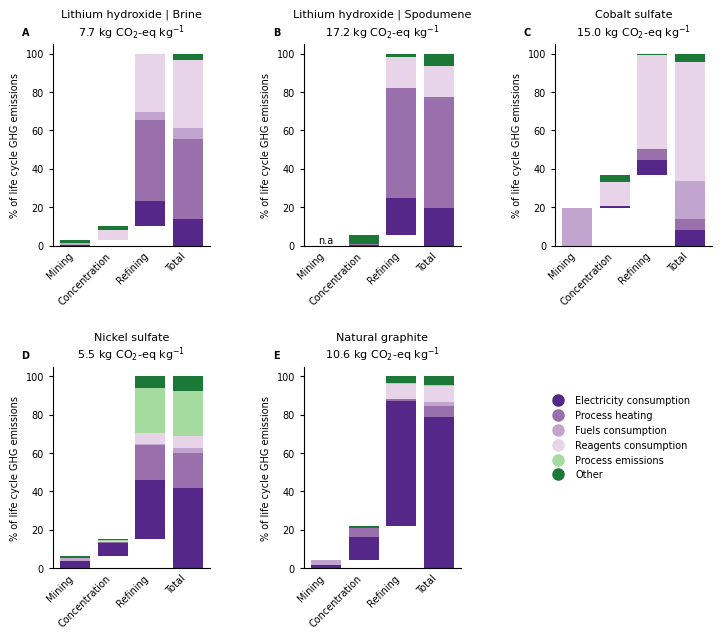

In [160]:
system_color = ['#542788',
                '#9970ab',
                '#c2a5cf',
                '#e7d4e8',
               # '#d9f0d3',
                '#a6dba0',
                '#1b7837']

width=0.8

fig, axs = plt.subplots(2, 3, figsize=(fig_length[2]*1.2, fig_height*0.7))
fig.delaxes(axs[1, 2])

metal_count = 0
main_title = ["A", "B", "C", "D", "E"]

for row in range(2):
     
    for col in range(3):
        if metal_count < 5:
            axs[row,col].set_title(main_title[metal_count], loc='left', x=-0.2, fontweight='bold', fontsize=fontsize_axs)
            title_with_ghg = titles[metal_count] + "\n" + str(round(total_ghgs.iloc[metal_count].values[0], 1)) + ' kg CO$_2$-eq kg$^{-1}$'

            axs[row,col].set_title(title_with_ghg, loc='center', fontsize=fontsize_title)

            metal_data = normalize_breakdown(breakdown_ghgs, METALS_LIST[metal_count])

            bottom = 0
            stage_loc = 0
            for stage in metal_data.columns:
                cont_count = 0
                if stage == "Total":
                    bottom = 0
                else:
                    pass
                for contributor in metal_data.index:
                    axs[row,col].bar(stage, metal_data[stage][contributor], bottom=bottom, color=system_color[cont_count],
                                width=width, lw=spineline_width, zorder=2)

                    bottom += metal_data[stage][contributor]
                    cont_count += 1
                stage_loc += 1

            axs[row,col].set_ylim(0, 105)
            axs[row,col].set_ylabel('% of life cycle GHG emissions', fontsize=fontsize_label)
            axs[row,col].tick_params(axis='y', which='major', direction='out', length=3, labelsize=fontsize_axs)
            axs[row,col].tick_params(axis='x', which='major', direction='out', length=0, labelsize=fontsize_axs)
        
            axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)

            axs[row,col].spines['right'].set_visible(False)
            axs[row,col].spines['top'].set_visible(False)
        else:
            pass
        metal_count += 1

axs[0,1].annotate("n.a", xy=(0, 0.2), ha='center', va='bottom', fontsize=fontsize_axs, color="black")

# LEGEND
handles = []
for i in range(len(CONTRIBUTORS_LIST)):
    patch = Line2D([0], [0], color=system_color[i], label=CONTRIBUTORS_LIST[i], ls='None', marker='o', ms=8)
    handles.append(patch)
axs[1,1].legend(handles=handles, bbox_to_anchor=(1.5,0.9), ncol=1, frameon=False, edgecolor='black',  facecolor='White', fontsize=fontsize_legend)

fig.subplots_adjust(wspace=0.6, hspace=0.6)

plt.savefig(Path(str(r"..\reports") + '/fig2_GHG_emissions_breakdown.jpg'), dpi=600, bbox_inches='tight')

### Fig S1: Breakdown reagents contribution

In [24]:
breakdown_reagents_ghgs = pd.read_csv(RESULTS_IMPORT_DIR / "ESI_breakdown_reagents_ghgs_01-04-2024.csv", index_col=0)

In [25]:
breakdown_reagents_ghgs

,Stage,Reagent,Value
Metal,,,
Cobalt,Mining,"neutralising agent, sodium hydroxide-equivalent",0.0
Cobalt,Mining,"hydrochloric acid, without water, in 30% solut...",0.0
Cobalt,Mining,"soda ash, light",0.0
Cobalt,Mining,"quicklime, milled, packed",0.0
Cobalt,Mining,sulfuric acid,0.0
...,...,...,...
"Graphite, natural",Refining,"hydrogen, gaseous, medium pressure, merchant",0.0
"Graphite, natural",Refining,naphthalene sulfonic acid,0.0
"Graphite, natural",Refining,"sodium chloride, powder",0.0


In [26]:
cumulative_ghgs_reagents = {}

for metal in METALS_LIST:
    df = breakdown_reagents_ghgs.loc[metal].set_index("Reagent")
    df = df.pivot_table(index='Reagent', columns='Stage', values='Value')
    impact_reagents = df.sum().sum()
    reagents_share = impact_reagents / total_ghgs.loc[metal].values[0] * 100
    df["Total"] = df.sum(axis=1)

    print(metal, reagents_share)

    df["Total"] = df["Total"] / total_ghgs.loc[metal].values[0] * 100

    df = df.sort_values("Total")
    cumulative_ghgs_reagents[metal] = {}
    cum_sum = 0
    for index, row in df.iterrows():
        cum_sum += row["Total"]
        cumulative_ghgs_reagents[metal][index] = cum_sum


Lithium, brine 35.543039640565915
Lithium, spodumene 16.10980030012723
Cobalt 61.94851731272595
Nickel 10.02324650742286
Graphite, natural 8.405917553387308


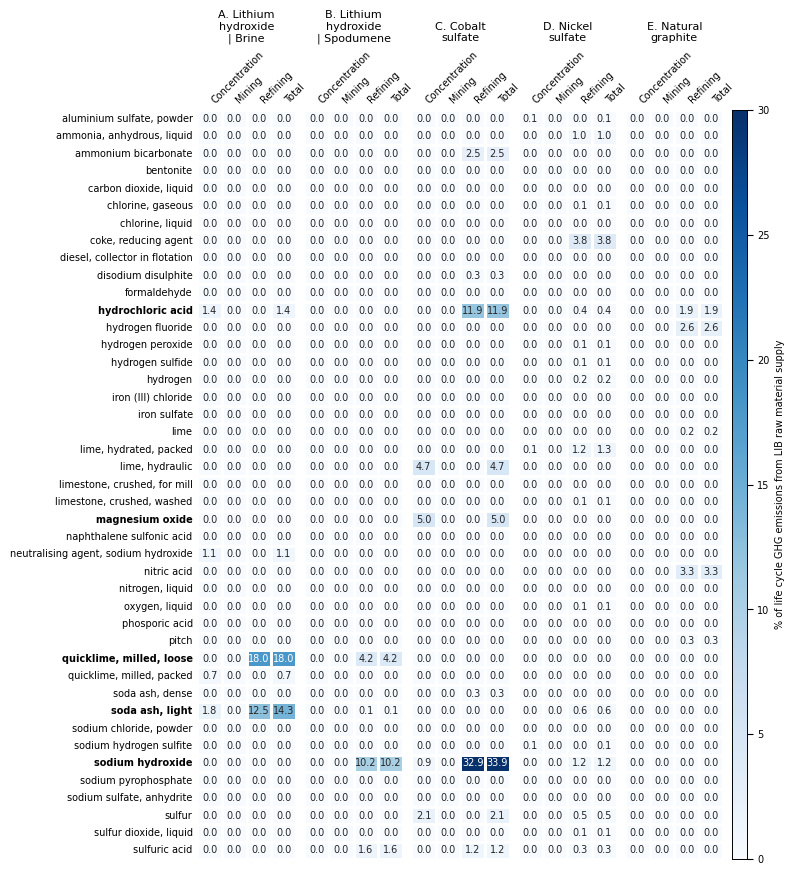

In [27]:
shorten_names = {
    "neutralising agent, sodium hydroxide-equivalent": "neutralising agent, sodium hydroxide",
    "hydrochloric acid, without water, in 30% solution state": "hydrochloric acid",
    "sodium hydroxide, without water, in 50% solution state": "sodium hydroxide",
    "hydrogen peroxide, without water, in 50% solution state": "hydrogen peroxide",
    "nitric acid, without water, in 50% solution state": "nitric acid",
    "phosphoric acid, fertiliser grade, without water, in 70% solution state": "phosporic acid",
    "kerosene": "dearomatized hydrocarbon fluid",
    "iron (III) chloride, without water, in 40% solution state": "iron (III) chloride",
    "hydrogen, gaseous, medium pressure, merchant": "hydrogen",
    "coke": "coke, reducing agent"
}

titles_space = [
    "A. Lithium\nhydroxide\n| Brine",
    "B. Lithium\nhydroxide\n| Spodumene",
    "C. Cobalt\nsulfate",
    "D. Nickel\nsulfate",
    "E. Natural\ngraphite"
]

df = breakdown_reagents_ghgs.loc["Lithium, brine"].set_index("Reagent")
df = df.pivot_table(index='Reagent', columns='Stage', values='Value')
reagents_list = df.index


fig, axs = plt.subplot_mosaic([METALS_LIST + ["Legend"]],
                            figsize=(fig_length[2], fig_height*1),
                            gridspec_kw={'width_ratios': [0.2] * len(METALS_LIST) + [0.03]})

counter = 0
for metal in METALS_LIST:
    axs[metal].set_title(titles_space[counter], loc='center', fontsize=fontsize_title)

    df = breakdown_reagents_ghgs.loc[metal].set_index("Reagent")
    df = df.pivot_table(index='Reagent', columns='Stage', values='Value')
    df = df / total_ghgs.loc[metal].values[0] * 100
    df["Total"] = df.sum(axis=1)
    df = df.reindex(index=reagents_list)
    df = df.rename(index=shorten_names)

   # df_normalized = df_normalized[(df_normalized != 0).any(axis=1)]

    if counter == 0:
        yticklabels=True
    else:
        yticklabels=False

    sns.heatmap(ax=axs[metal], data=df, cmap="Blues", vmin=0, vmax=30, annot=True, fmt='.1f', annot_kws={"size": 7}, 
                xticklabels=True, yticklabels=yticklabels, linewidths=0.8, linecolor='white', cbar=True, cbar_ax=axs['Legend'])
    axs[metal].set_ylabel("")
    axs[metal].set_xlabel("")

    if counter == 0:
        for lab, annot in zip(axs[metal].get_yticklabels(), axs[metal].texts):
            text = lab.get_text()
            if text in ["soda ash, light", "kerosene", "sodium hydroxide",
                        "quicklime, milled, loose", "magnesium oxide",
                    
                        "hydrochloric acid"]:
                # set the properties of the ticklabel
                lab.set_weight('bold')

    counter += 1
    
for col in METALS_LIST:
    axs[col].set_xticklabels(df.columns, rotation = 45, ha="left", fontsize=fontsize_axs)
    axs[col].xaxis.tick_top()
    axs[col].tick_params(axis='x', which='major', direction='in', length=0, labelsize=fontsize_axs)
    axs[col].tick_params(axis='y', which='major', direction='in', length=0, labelsize=fontsize_axs)

    
for spine in axs["Legend"].spines.values():
    spine.set(visible=True, lw=spineline_width, edgecolor="black")
axs["Legend"].tick_params(axis='y', which='major', direction='out', length=4, labelsize=fontsize_axs)
    
axs['Legend'].set_ylabel('% of life cycle GHG emissions from LIB raw material supply', fontsize=fontsize_label)

fig.subplots_adjust(wspace=0.1)

plt.savefig(Path(str(r"..\reports") + '/SI_reagents_emissions_breakdown.jpg'), dpi=600, bbox_inches='tight')

### Fig 4: Actual mitigation potential

In [173]:
actual_mitigation_potential = pd.read_csv(RESULTS_IMPORT_DIR / "fig4_actual_mitigaiton_potential_04-04-2024.csv", index_col=0)

In [174]:
strategies_name = {
    "BAU": "Business-as-usual",
    "ONSITE_ELEC": "Switch to wind power in mining, concentration, and refining",
    "PROCESS_HEAT": "Electrification of process heat in mining, concentration, and refining",
    "CHEMICAL_WIND": "Switch to wind power in the chemical industry",
    "CHEMICAL_HEAT": "Electrification of heat in the chemical industry",
    "GLOBAL_ELEC": "Switch to wind power in the global economy",
}

In [175]:
actual_mitigation_potential

,BAU,ONSITE_ELEC,PROCESS_HEAT,CHEMICALS_ELEC,CHEMICALS_HEAT,GLOBAL_ELEC
Metal,,,,,,
"Lithium, brine",7.702184,6.682593,3.511477,3.291143,2.709284,2.423571
"Lithium, spodumene",17.237323,13.962542,6.001898,4.573668,4.400437,3.500761
Cobalt,14.990897,13.834389,13.231838,8.593891,7.965900,6.764520
Nickel,5.479065,3.251372,2.469907,2.328219,2.274680,2.117043
"Graphite, natural",10.560489,2.375203,1.920000,1.710752,1.571302,1.299817


In [176]:
mitigation_normalized = actual_mitigation_potential.div(actual_mitigation_potential["BAU"], axis=0).multiply(100)
mitigation_normalized

,BAU,ONSITE_ELEC,PROCESS_HEAT,CHEMICALS_ELEC,CHEMICALS_HEAT,GLOBAL_ELEC
Metal,,,,,,
"Lithium, brine",100.0,86.762303,45.590667,42.729996,35.175532,31.466021
"Lithium, spodumene",100.0,81.001798,34.819198,26.533519,25.528541,20.309191
Cobalt,100.0,92.285260,88.265820,57.327397,53.138245,45.124183
Nickel,100.0,59.341723,45.078980,42.492997,41.515843,38.638760
"Graphite, natural",100.0,22.491409,18.180975,16.199548,14.879066,12.308301


In [177]:
ghgs_times_reduction = 1 / actual_mitigation_potential.div(actual_mitigation_potential["BAU"], axis=0)
ghgs_times_reduction

,BAU,ONSITE_ELEC,PROCESS_HEAT,CHEMICALS_ELEC,CHEMICALS_HEAT,GLOBAL_ELEC
Metal,,,,,,
"Lithium, brine",1.0,1.152574,2.193431,2.340276,2.842885,3.178031
"Lithium, spodumene",1.0,1.234540,2.871979,3.768818,3.917184,4.923879
Cobalt,1.0,1.083597,1.132941,1.744367,1.881884,2.216107
Nickel,1.0,1.685155,2.218329,2.353329,2.408719,2.588075
"Graphite, natural",1.0,4.446142,5.500255,6.173012,6.720852,8.124598


In [178]:
mitigation_potential = mitigation_normalized["BAU"] - mitigation_normalized["CHEMICALS_HEAT"]
mitigation_potential

Metal
Lithium, brine        64.824468
Lithium, spodumene    74.471459
Cobalt                46.861755
Nickel                58.484157
Graphite, natural     85.120934
dtype: float64

In [179]:
mitigation_gap = mitigation_normalized.iloc[:,-1]
mitigation_gap

Metal
Lithium, brine        31.466021
Lithium, spodumene    20.309191
Cobalt                45.124183
Nickel                38.638760
Graphite, natural     12.308301
Name: GLOBAL_ELEC, dtype: float64

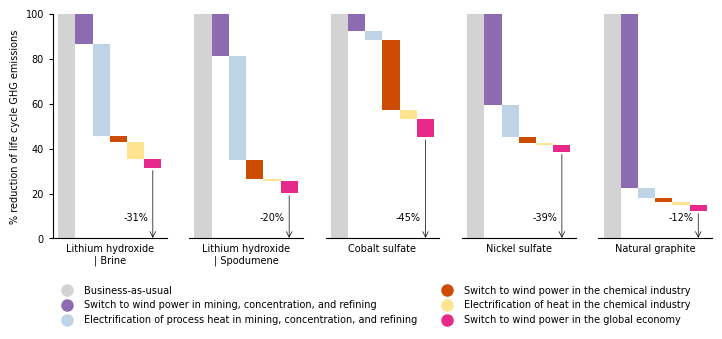

In [182]:
titles_space_v2 = [
    "Lithium hydroxide\n| Brine",
    "Lithium hydroxide\n| Spodumene",
    "Cobalt sulfate",
    "Nickel sulfate",
    "Natural graphite"
]

strategy_color = ["lightgrey", "#8c6bb1", "#bfd3e6", "#cc4c02", "#fee391", "#e7298a"]
width=1

fig, axs = plt.subplots(1, 5, figsize=(fig_length[2]*1.2, fig_height*0.3), sharey=True)

metal_count = 0
for metal in mitigation_normalized.index:
 #   axs[metal_count].set_title(main_title[metal_count], loc='left', x=-0.15, fontweight='bold', fontsize=fontsize_axs)
  #  axs[metal_count].suptitle(titles_space_v2[metal_count], loc='center', fontsize=fontsize_title)
    axs[metal_count].set_xlabel(titles_space_v2[metal_count], fontsize=fontsize_label)

    count_strategy = 0
    for scenario in mitigation_normalized.columns:

        if count_strategy < 2:
            axs[metal_count].bar(count_strategy, 100, color=strategy_color[count_strategy], width=width, lw=spineline_width, zorder=2)
        else:
            previous = mitigation_normalized.loc[metal].iloc[count_strategy-1]
            axs[metal_count].bar(count_strategy, previous, color=strategy_color[count_strategy], width=width, lw=spineline_width, zorder=2)

        if count_strategy > 0:
            axs[metal_count].bar(count_strategy, mitigation_normalized.loc[metal][scenario], color="white", width=width, lw=spineline_width, zorder=2)

        if count_strategy == len(mitigation_normalized):
            axs[metal_count].annotate('', xy=(count_strategy, -1), xytext=(count_strategy, mitigation_gap[metal]),
                    arrowprops=dict(arrowstyle='->', color='black', linewidth=0.5),
                    annotation_clip=False)
                
            axs[metal_count].text(count_strategy-1, 9, "-" + str(round(mitigation_gap[metal])) + '%', ha="center", va="center", rotation=0, size=fontsize_axs, 
                        )

        count_strategy += 1

    axs[metal_count].tick_params(axis='y', which='major', direction='out', length=3, labelsize=fontsize_axs)
    axs[metal_count].tick_params(axis='x', which='major', direction='out', length=0, labelsize=fontsize_axs)
    axs[metal_count].set_ylim(0, 100)
    axs[metal_count].set_xticks([])
    
    axs[metal_count].spines['right'].set_visible(False)
    axs[metal_count].spines['top'].set_visible(False)
    if metal_count > 0:
        axs[metal_count].spines['left'].set_visible(False)
        axs[metal_count].tick_params(axis='y', which='major', direction='out', length=0, labelsize=fontsize_axs)

    metal_count += 1

axs[0].set_ylabel('% reduction of life cycle GHG emissions', fontsize=fontsize_label)

patch_1 = Line2D([0], [0], color=strategy_color[0], label=strategies_name["BAU"], ls='None', marker='o', ms=8)
patch_2 = Line2D([0], [0], color=strategy_color[1], label=strategies_name["ONSITE_ELEC"], ls='None', marker='o', ms=8)
patch_3 = Line2D([0], [0], color=strategy_color[2], label=strategies_name["PROCESS_HEAT"], ls='None', marker='o', ms=8)
patch_4 = Line2D([0], [0], color=strategy_color[3], label=strategies_name["CHEMICAL_WIND"], ls='None', marker='o', ms=8)
patch_5 = Line2D([0], [0], color=strategy_color[4], label=strategies_name["CHEMICAL_HEAT"], ls='None', marker='o', ms=8)
patch_6 = Line2D([0], [0], color=strategy_color[5], label=strategies_name["GLOBAL_ELEC"], ls='None', marker='o', ms=8)

axs[2].legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5, patch_6], 
              bbox_to_anchor=(3.29,-0.17), ncol=2, frameon=False, edgecolor='black',  facecolor='White', fontsize=fontsize_legend)

plt.savefig(Path(str(r"..\reports") + '/fig4_actual_mitigation_potential.jpg'), dpi=600, bbox_inches='tight')

### Fig 5: Decoupling GHG emissions - production volumes

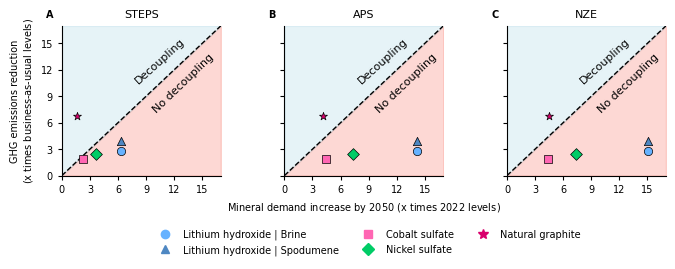

In [136]:
main_title = ["A", "B", "C"]
x_max = 17
y_max = 17
markers = ["o", "^", "s", "D", "*"]
marker_color = ["#66b2ff", "#4E87C2", "#FF66B3", "#00CC66", "#D9006D"]

fig, axs = plt.subplots(1, 3, figsize=(fig_length[2]*1.1, fig_height*0.2), sharey=True)

count = 0
for scenario in ["STEPS", "APS", "NZE"]:
    total_demand_2050 = total_demand[(total_demand["Scenario"] == scenario) & (total_demand["Year"] == 2050)].reset_index()
    ev_demand_2050 = ev_demand[(ev_demand["Scenario"] == scenario) & (ev_demand["Year"] == 2050)].reset_index()

    total_demand_increase_rltv_2050 = total_demand_2050.iloc[:,3:].div(total_demand_2022.iloc[:,3:], axis=0)
    total_demand_increase_rltv_2050 = total_demand_increase_rltv_2050.T.sort_values(by=0, ascending=False)

    total_demand_increase_abs_2050 = total_demand_2050.iloc[:,3:] - total_demand_2022.iloc[:,3:]
    ev_demand_increase_abs_2050 = ev_demand_2050.iloc[:,3:] - ev_demand_2022.iloc[:,3:]
    demand_increase_by_ev = ev_demand_increase_abs_2050.div(total_demand_increase_abs_2050).T

    demand_times_increase = total_demand_increase_rltv_2050 * demand_increase_by_ev

    decoupling_df = ghgs_times_reduction[["CHEMICALS_HEAT"]]
    decoupling_df = decoupling_df.rename(columns={"CHEMICALS_HEAT": "GHG emissions reduction"})

    decoupling_df.at["Lithium, brine", "Demand increase"] = demand_times_increase.loc["Lithium"].values
    decoupling_df.at["Lithium, spodumene", "Demand increase"] = demand_times_increase.loc["Lithium"].values
    decoupling_df.at["Cobalt", "Demand increase"] = demand_times_increase.loc["Cobalt"].values
    decoupling_df.at["Nickel", "Demand increase"] = demand_times_increase.loc["Nickel"].values
    decoupling_df.at["Graphite, natural", "Demand increase"] = demand_times_increase.loc["Graphite"].values

    axs[count].set_title(main_title[count], loc='left', x=-0.1, fontweight='bold', fontsize=fontsize_axs)
    axs[count].set_title(scenario, loc='center', fontsize=fontsize_title)

    for i, (x, y) in enumerate(zip(decoupling_df["Demand increase"], decoupling_df["GHG emissions reduction"])):
        axs[count].scatter(x, y, marker=markers[i], color=marker_color[i], edgecolor="black", linewidth=0.5, zorder=3)

    axs[count].set_xlim(0,x_max,)
    axs[count].set_ylim(0,y_max)
    axs[count].xaxis.set_major_locator(ticker.MultipleLocator(base=3))
    axs[count].yaxis.set_major_locator(ticker.MultipleLocator(base=3)) 

    axs[count].plot([0, x_max], [0, y_max], color='black', linestyle='--', lw=1)
    axs[count].fill_between([0, x_max], [0, y_max], y2=0, color='salmon', alpha=0.3, zorder=1)
    axs[count].fill_between([0, x_max], [0, y_max], y2=y_max, color='lightblue', alpha=0.3, zorder=1)

    axs[count].tick_params(axis='y', which='major', direction='out', length=3, labelsize=fontsize_axs)
    axs[count].tick_params(axis='x', which='major', direction='out', length=3, labelsize=fontsize_axs)
    axs[count].spines['right'].set_visible(False)
    axs[count].spines['top'].set_visible(False)
    
    axs[count].text(13, 10.5, "No decoupling", ha="center", va="center", rotation=44, size=8)
    axs[count].text(10.5, 13, "Decoupling", ha="center", va="center", rotation=42, size=8)

    count += 1

axs[1].set_xlabel('Mineral demand increase by 2050 (x times 2022 levels$^{}$)', fontsize=fontsize_label)
axs[0].set_ylabel('GHG emissions reduction\n(x times business-as-usual levels$^{}$)', fontsize=fontsize_label)

fig.subplots_adjust(wspace=0.4)

patch_1 = Line2D([0], [0], color=marker_color[0], label=titles[0], ls='None', marker=markers[0], ms=6)
patch_2 = Line2D([0], [0], color=marker_color[1], label=titles[1], ls='None', marker=markers[1], ms=6)
patch_3 = Line2D([0], [0], color=marker_color[2], label=titles[2], ls='None', marker=markers[2], ms=6)
patch_4 = Line2D([0], [0], color=marker_color[3], label=titles[3], ls='None', marker=markers[3], ms=6)
patch_5 = Line2D([0], [0], color=marker_color[4], label=titles[4], ls='None', marker=markers[4], ms=7)

axs[1].legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5], 
              bbox_to_anchor=(1.92,-0.3), ncol=3, frameon=False, edgecolor='black',  facecolor='White', fontsize=fontsize_legend)

plt.savefig(Path(str(r"..\reports") + '/fig5_decoupling.jpg'), dpi=600, bbox_inches='tight')